In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler #For normalization 


stardle_db = pd.read_csv('stradle_db.csv')
stardle_db

,name,cargo_capacity,mass,crew,manufacturer,type,status,role,price,release_date,scm,max,length,beam,height
0,100i,2,4.814300e+04,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Touring'}",50.0,2020,260.000000,1425.000000,19.000000,12.00000,5.000000
1,125a,2,4.814300e+04,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Fighter'}",60.0,2020,260.000000,1425.000000,19.000000,12.00000,5.000000
2,135c,6,4.814300e+04,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",65.0,2020,260.000000,1425.000000,19.000000,12.00000,5.000000
3,300i,8,7.967700e+04,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Touring', '1': 'Luxury'}",60.0,2014,260.000000,1425.000000,27.000000,17.00000,8.000000
4,315p,12,8.059200e+04,1,Origin Jumpworks,exploration,flight-ready,{'0': 'Pathfinder'},65.0,2014,260.000000,1425.000000,27.000000,17.00000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,X1 Force,0,4.730000e+03,1,Origin Jumpworks,exploration,flight-ready,{'0': 'Combat'},50.0,2023,207.000000,569.000000,1.550000,5.19000,1.870000
198,X1 Velocity,0,4.730000e+03,1,Origin Jumpworks,competition,flight-ready,{'0': 'Racing'},45.0,2023,222.000000,611.000000,1.550000,5.19000,1.870000
199,Zeus CL Mk II,128,2.950000e+05,3,Roberts Space Industries,transport,flight-ready,{'0': 'Medium Freight'},150.0,2024,200.548276,1015.039735,45.859793,28.71057,12.906062
200,Zeus ES Mk II,32,2.950000e+05,3,Roberts Space Industries,exploration,flight-ready,{'0': 'Expedition'},150.0,2024,200.548276,1015.039735,45.859793,28.71057,12.906062


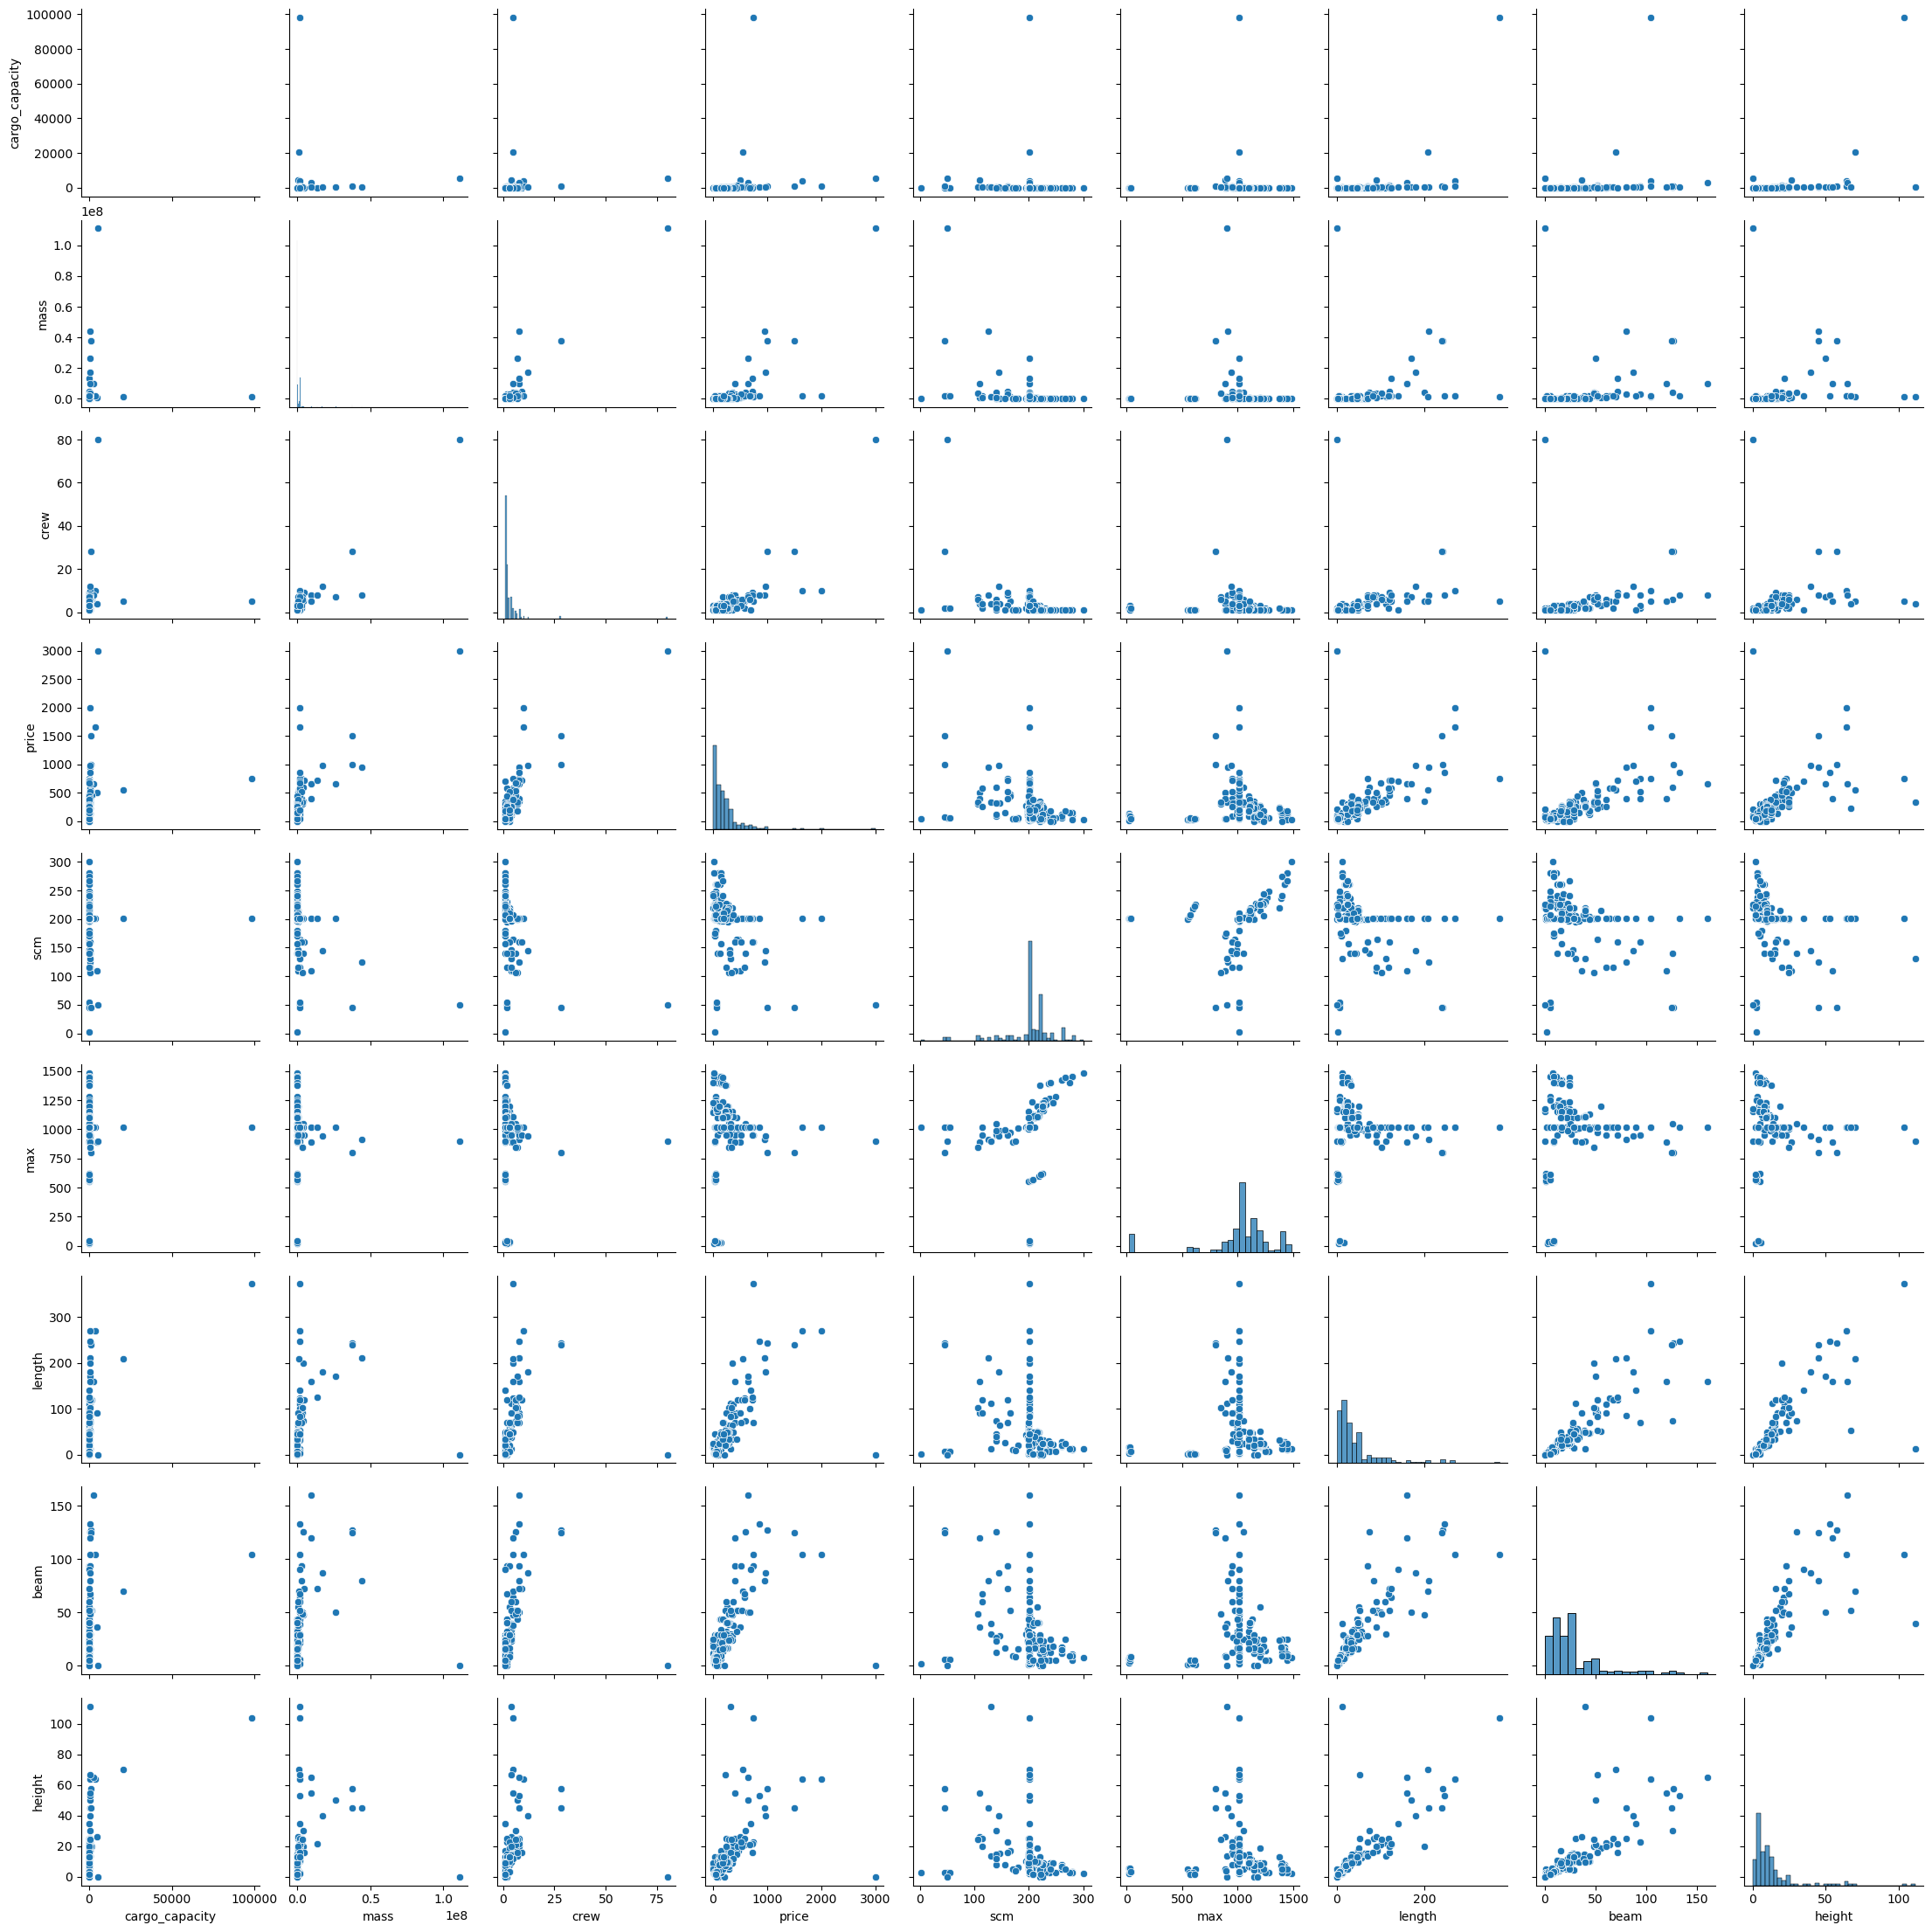

In [12]:
sns.pairplot(stardle_db)

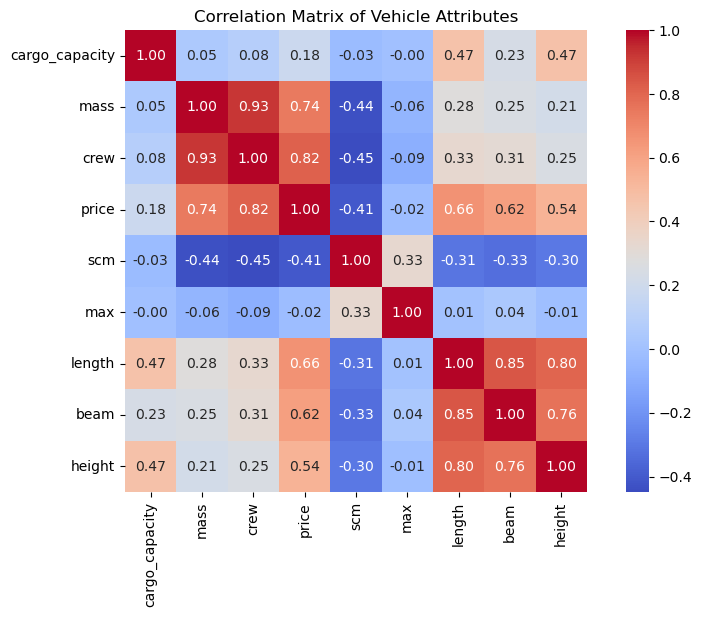

In [14]:
colonnes_numeriques = stardle_db.select_dtypes(include=['int64', 'float64'])

correlation = colonnes_numeriques.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Vehicle Attributes')
plt.show()

In [ ]:
stardle_db.sort_values('type')

,name,cargo_capacity,mass,crew,manufacturer,type,status,role,price,release_date,scm,max,length,beam,height
201,Zeus MR Mk II,16,2.096882e+06,3,Roberts Space Industries,combat,in-concept,{'0': 'Interdiction'},190.0,Unreleased,200.548276,1015.039735,45.859793,28.71057,12.906062
90,Gladius,0,5.135200e+04,1,Aegis Dynamics,combat,flight-ready,{'0': 'Light Fighter'},90.0,2015,225.000000,1230.000000,21.000000,17.50000,5.500000
89,Gladiator,0,8.840800e+04,2,Anvil Aerospace,combat,flight-ready,{'0': 'Bomber'},165.0,2015,210.000000,1125.000000,22.750000,21.00000,6.000000
168,Sabre Raven,0,7.081100e+04,1,Aegis Dynamics,combat,flight-ready,{'0': 'Interdiction'},0.0,2017,240.000000,1400.000000,24.500000,24.50000,5.000000
169,San'tok.yāi,0,8.852400e+04,1,Aopoa,combat,flight-ready,{'0': 'Medium Fighter'},240.0,2023,227.000000,1161.000000,24.000000,23.00000,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Freelancer,66,2.316960e+05,4,Musashi Industrial and Starflight Concern,transport,flight-ready,{'0': 'Medium Freight'},110.0,2016,197.000000,1010.000000,38.000000,23.50000,9.500000
63,E1 Spirit,0,2.096882e+06,2,Crusader Industries,transport,in-concept,{'0': 'Passenger'},150.0,Unreleased,200.548276,1015.039735,46.500000,43.50000,10.000000
52,Cutter,4,8.687700e+04,1,Drake Interplanetary,transport,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",45.0,2022,180.000000,1010.000000,20.000000,16.00000,6.000000
177,Starlancer MAX,224,8.142710e+05,4,Musashi Industrial and Starflight Concern,transport,flight-ready,{'0': 'Medium Freight'},250.0,2024,115.000000,950.000000,90.000000,60.00000,20.000000


In [16]:
list(stardle_db.sort_values('type')['type'])

['combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'combat',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'competition',
 'expl

In [ ]:
for i in list(stardle_db.sort_values('type')['type']):
    
    


exploration_ships = stardle_db[stardle_db['type'] == 'exploration']
exploration_ships

,name,dimensions,cargo_capacity,mass,crew,speed,manufacturer,type,status,role,price,release_date
315p,315p,27,12,80592,1,1425,Origin Jumpworks,exploration,flight-ready,{'0': 'Pathfinder'},65.0,2014
400i,400i,56,42,430057,3,1000,Origin Jumpworks,exploration,flight-ready,{'0': 'Touring'},250.0,2021
600i Explorer,600i Explorer,91.5,44,1622067,5,975,Origin Jumpworks,exploration,flight-ready,{'0': 'Expedition'},475.0,2018
600i Touring,600i Touring,91.5,20,1613414,5,975,Origin Jumpworks,exploration,flight-ready,{'0': 'Touring'},435.0,2018
85X,85X,13.5,0,19834,2,1250,Origin Jumpworks,exploration,flight-ready,{'0': 'Touring'},50.0,2016
890 Jump,890 Jump,210,388,44237159,8,915,Origin Jumpworks,exploration,flight-ready,{'0': 'Luxury Touring'},950.0,2019
Aurora LX,Aurora LX,19,3,26736,1,1200,Roberts Space Industries,exploration,flight-ready,{'0': 'Pathfinder'},35.0,2014
C8 Pisces,C8 Pisces,16,4,48143,3,1150,Anvil Aerospace,exploration,flight-ready,{'0': 'Exploration'},0.0,2019
C8X Pisces Expedition,C8X Pisces Expedition,16,4,48143,3,1150,Anvil Aerospace,exploration,flight-ready,{'0': 'Expedition'},45.0,2019
Carrack,Carrack,74,456,4397858,6,1050,Anvil Aerospace,exploration,flight-ready,{'0': 'Expedition'},600.0,2019


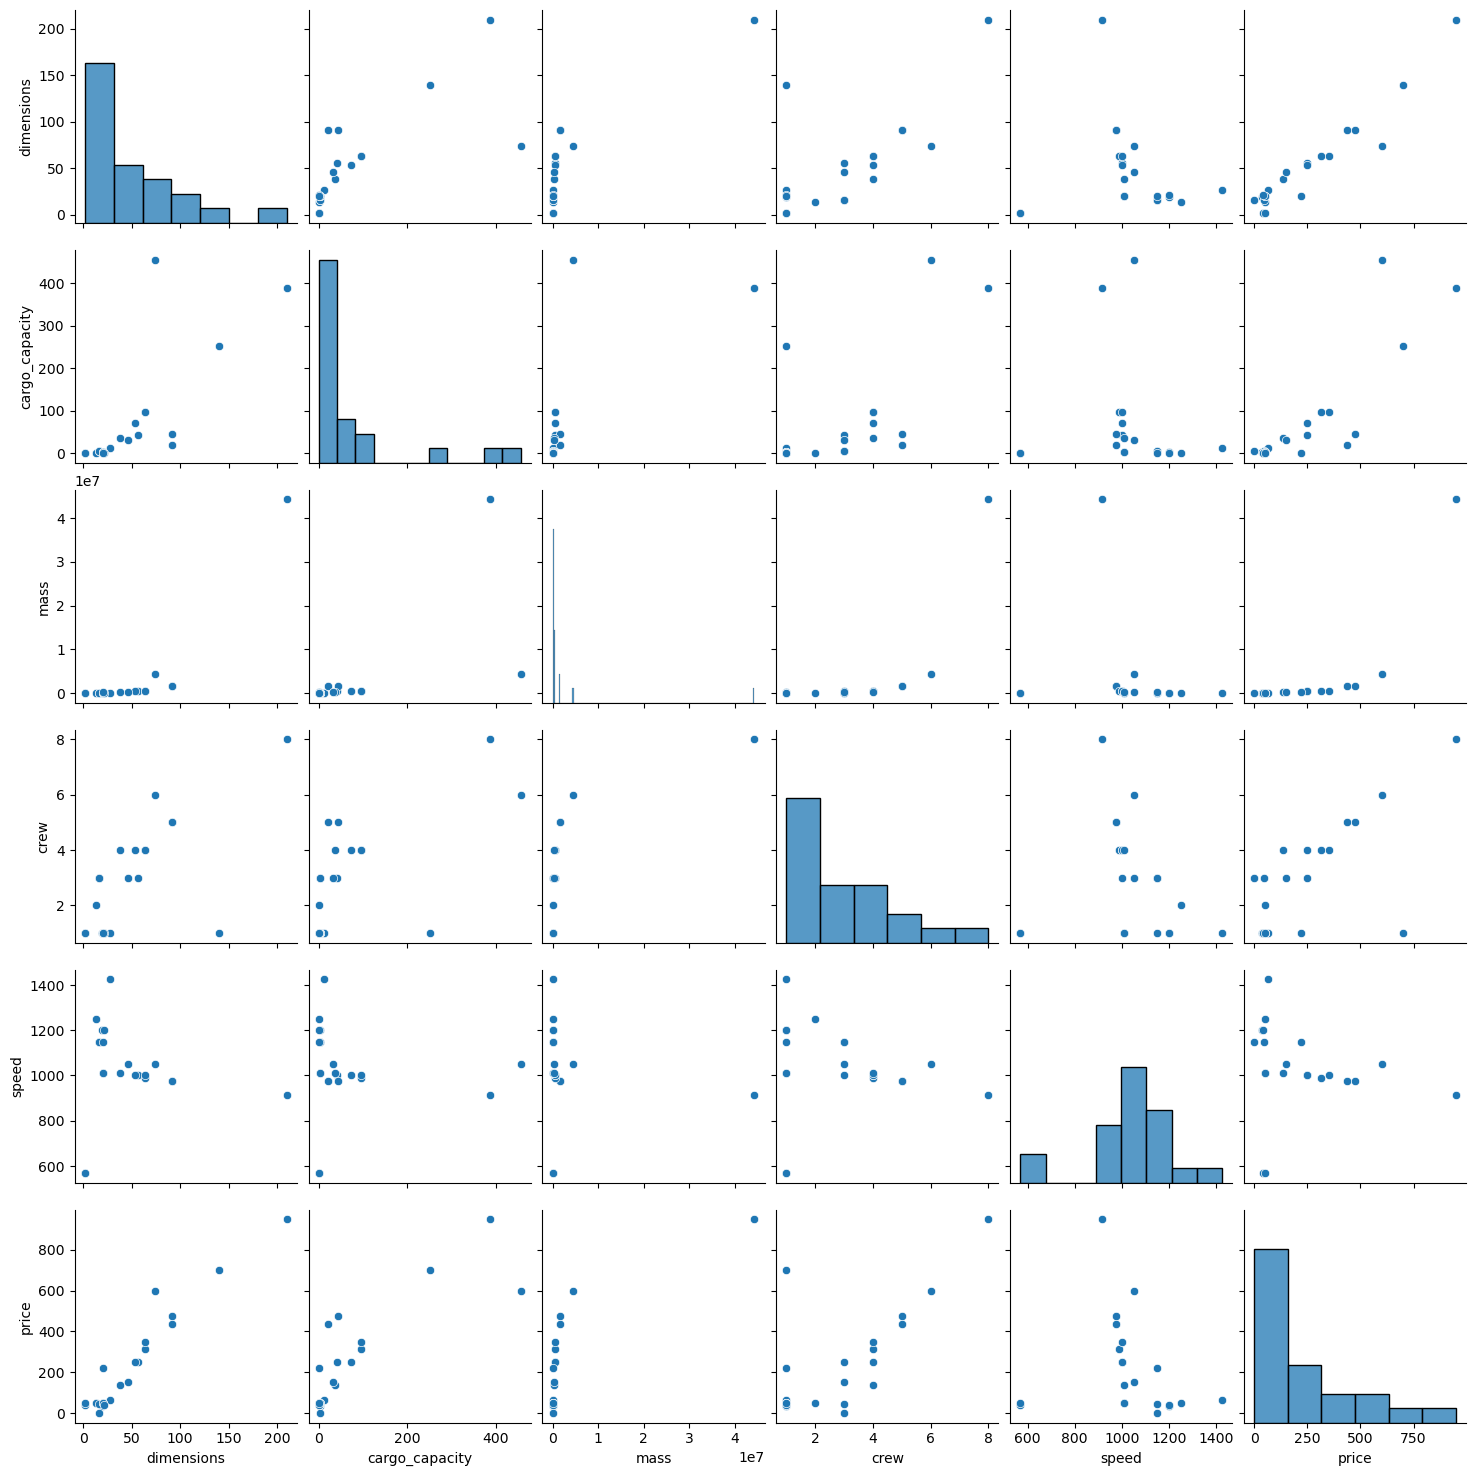

In [ ]:
sns.pairplot(exploration_ships)

In [ ]:
combat_ships = stardle_db[stardle_db['type'] == 'combat']
combat_ships

,name,dimensions,cargo_capacity,mass,crew,speed,manufacturer,type,status,role,price,release_date
325a,325a,27.5,4,79324,1,1425,Origin Jumpworks,combat,flight-ready,"{'0': 'Light Fighter', '1': 'Interdiction'}",70.0,2014
A1 Spirit,A1 Spirit,44,0,314271,2,1130,Crusader Industries,combat,flight-ready,{'0': 'Bomber'},200.0,2023
A2 Hercules,A2 Hercules,70,216,3139240,8,950,Crusader Industries,combat,flight-ready,{'0': 'Heavy Bomber'},750.0,2021
Ares Star Fighter Inferno,Ares Star Fighter Inferno,27,0,329001,1,1100,Crusader Industries,combat,flight-ready,{'0': 'Heavy Fighter'},250.0,2021
Ares Star Fighter Ion,Ares Star Fighter Ion,27,0,329001,1,1100,Crusader Industries,combat,flight-ready,{'0': 'Heavy Fighter'},250.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
Vanguard Harbinger,Vanguard Harbinger,48,0,236604,2,1115,Aegis Dynamics,combat,flight-ready,{'0': 'Bomber'},290.0,2019
Vanguard Hoplite,Vanguard Hoplite,48,0,234870,2,1115,Aegis Dynamics,combat,flight-ready,{'0': 'Dropship'},240.0,2016
Vanguard Sentinel,Vanguard Sentinel,48,0,232170,2,1111,Aegis Dynamics,combat,flight-ready,{'0': 'Interdiction'},275.0,2019
Vanguard Warden,Vanguard Warden,48,0,244270,2,1111,Aegis Dynamics,combat,flight-ready,{'0': 'Heavy Fighter'},260.0,2016


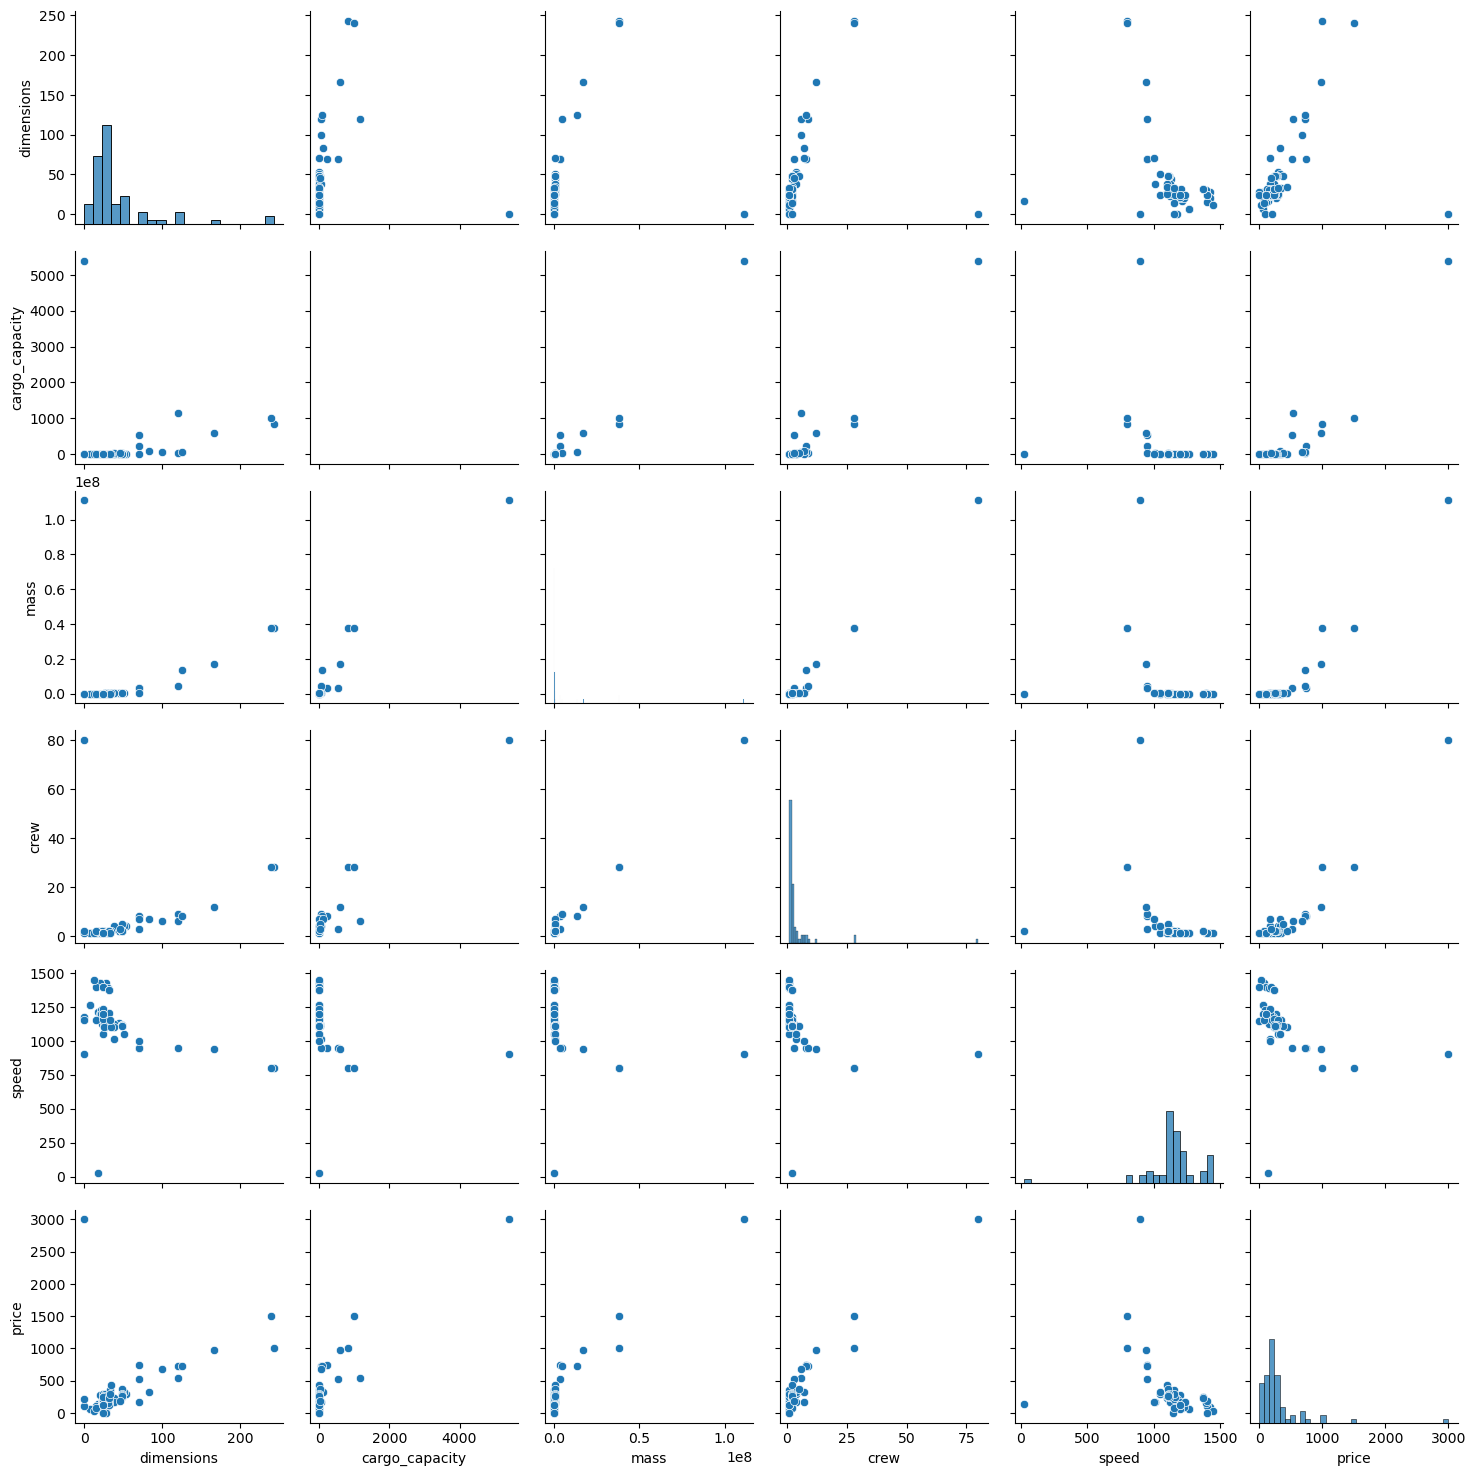

In [ ]:
sns.pairplot(combat_ships)

In [ ]:
transport_ships = stardle_db[stardle_db['type'] == 'transport']
transport_ships

,name,dimensions,cargo_capacity,mass,crew,speed,manufacturer,type,status,role,price,release_date
Aurora CL,Aurora CL,19,6,26422,1,1200,Roberts Space Industries,transport,flight-ready,{'0': 'Light Freight'},45.0,2014
Aurora LN,Aurora LN,19,3,28714,1,1200,Roberts Space Industries,transport,flight-ready,{'0': 'Light Fighter'},40.0,2014
Aurora MR,Aurora MR,19,3,27893,1,1200,Roberts Space Industries,transport,flight-ready,{'0': 'Light Fighter'},30.0,2014
Avenger Titan,Avenger Titan,20,8,51363,1,1425,Aegis Dynamics,transport,flight-ready,{'0': 'Light Freight'},60.0,2014
C1 Spirit,C1 Spirit,44,64,314271,2,1130,Crusader Industries,transport,flight-ready,{'0': 'Medium Freight'},125.0,2023
C2 Hercules,C2 Hercules,70,696,3139240,2,950,Crusader Industries,transport,flight-ready,{'0': 'Heavy Freight'},400.0,2021
Caterpillar,Caterpillar,13.4,576,1660063,4,900,Drake Interplanetary,transport,flight-ready,{'0': 'Heavy Freight'},330.0,2016
Caterpillar Pirate Edition,Caterpillar Pirate Edition,13.4,576,1660063,4,900,Drake Interplanetary,transport,flight-ready,{'0': 'Heavy Freight'},330.0,2016
Constellation Taurus,Constellation Taurus,70,174,427001,4,1000,Roberts Space Industries,transport,flight-ready,{'0': 'Medium Freight'},200.0,2021
Cutter,Cutter,20,4,86877,1,1010,Drake Interplanetary,transport,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",45.0,2022


In [ ]:
multi_ships = stardle_db[stardle_db['type'] == 'multi']
multi_ships

,name,dimensions,cargo_capacity,mass,crew,speed,manufacturer,type,status,role,price,release_date
100i,100i,19,2,48143,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Touring'}",50.0,2020
125a,125a,19,2,48143,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Fighter'}",60.0,2020
135c,135c,19,6,48143,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",65.0,2020
300i,300i,27,8,79677,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Touring', '1': 'Luxury'}",60.0,2014
Aurora ES,Aurora ES,19,3,26486,1,1200,Roberts Space Industries,multi,flight-ready,"{'0': 'Starter', '1': 'Pathfinder'}",20.0,2014
Constellation Andromeda,Constellation Andromeda,63.5,96,430057,4,1000,Roberts Space Industries,multi,flight-ready,"{'0': 'Medium Freight', '1': 'Gunship'}",240.0,2015
Cutlass Black,Cutlass Black,37.5,46,246577,3,1125,Drake Interplanetary,multi,flight-ready,{'0': 'Medium Freight'},110.0,2014
Galaxy,Galaxy,110,64,None,6,None,Roberts Space Industries,multi,in-concept,{'0': 'Modular'},380.0,Unreleased
Mustang Alpha,Mustang Alpha,21.5,4,34221,1,1200,Consolidated Outland,multi,flight-ready,{'0': 'Cargo'},30.0,2014
Nomad,Nomad,19,24,228123,1,1100,Consolidated Outland,multi,flight-ready,{'0': 'Starter'},80.0,2020
